In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d']

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_05_29_isotope_debugging'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


0:00:00.915455  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_162ufwhk. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 898,258,194,432
0:00:00.926522  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:00.926872  INFO: 


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)

In [3]:
test_lib.precursor_df.channel.value_counts()

0     91732
4     45867
8     45867
12    45867
Name: channel, dtype: int64

In [4]:
from yaml import safe_load
config_update = safe_load(open("/Users/georgwallmann/Documents/data/alphadia_benchmarking/2023_07_13_alphadiagui/config.yaml", 'r'))

In [5]:
print(raw_files)

['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d']


In [6]:
plan = Plan(raw_files, config_update = config_update )
plan.from_spec_lib_base(test_lib)

0:00:12.818896  PROGRESS:       _   _      _         ___ ___   _   
0:00:12.819411  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:12.819646  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:12.819863  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:12.820093  PROGRESS:            |_|                            
0:00:12.820459  PROGRESS: 
0:00:12.820991  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default_new.yaml
0:00:12.828037  INFO: Applying config update from dict
0:00:12.828400  PROGRESS: version: 1.0.1
0:00:12.828651  PROGRESS: hostname: Georgs-MacBook-Pro.local
0:00:12.828892  PROGRESS: date: 2023-07-17 11:33:56
0:00:16.483008  INFO: renaming precursor_columns columns
0:00:16.483848  INFO: renaming fragment_columns columns
0:00:16.484163  INFO: ========= Library Stats =========
0:00:16.484347  INFO: Number of precursors: 229,333
0:00:16.514061  INFO: 	thereof targets:183,468
0:00:1

0:00:14.114694  INFO: rt_type automatically determined as irt
0:00:14.115170  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
0:00:14.115470  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
0:00:14.115782  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
0:00:14.243244  INFO: Reading 17,439 frames with 1,609,581,456 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
100%|██████████| 17439/174

7819


  0%|          | 0/13778 [00:00<?, ?it/s]/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from float64 to float32. Precision may be lost.
  numba_func(i, *args)
/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  numba_func(i, *args)
100%|██████████| 13778/13778 [00:58<00:00, 235.48it/s] 
0:04:04.379012  WARNING: base_width_mobility has 7 NaNs ( 0.05 % out of 13778)
0:04:04.379643  WARNING: base_width_rt has 7 NaNs ( 0.05 % out of 13778)
0:04:04.380224  WARNING: rt_observed has 7 NaNs ( 0.05 % out of 13778)
0:04:04.380761  WARNING: mobility_observed has 7 NaNs ( 0.05 % out of 13778)
0:04:04.381428  WARNING: mono_ms1_intensity has 7 NaNs ( 0.05 % out of 13778)
0:04:04.382026  WARNING: top_ms1_intensity has 7 NaNs ( 0.05 % out of 13778)
0:04:04.382604  WARNING: sum_ms1_intensity has 7 NaNs ( 0.05 % out of 13778)
0:04:04.383191  WARNI

(13770, 37)
(13770,)


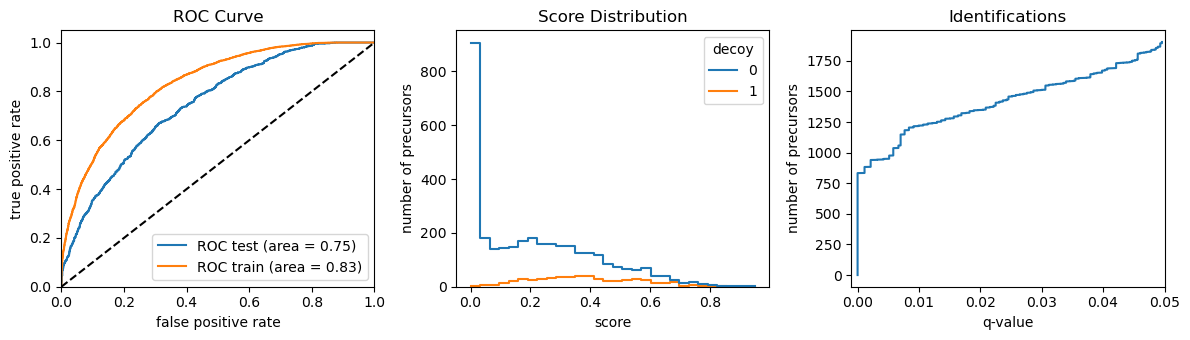

0:04:10.281388  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:04:10.282547  PROGRESS: Accumulated precursors: 3,900, 0.01 FDR: 1,222, 0.001 FDR: 834
0:04:10.283577  INFO: calibration group: precursor, fitting mz estimator 


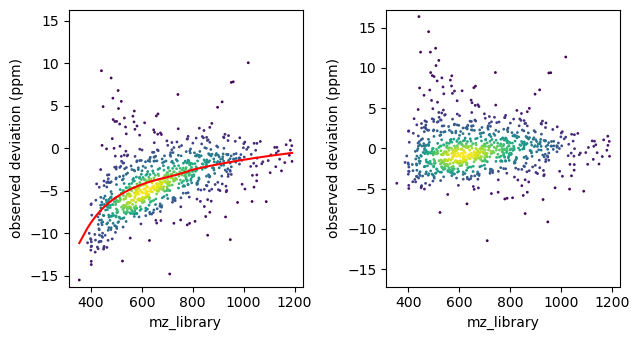

0:04:10.383546  INFO: calibration group: precursor, fitting rt estimator 


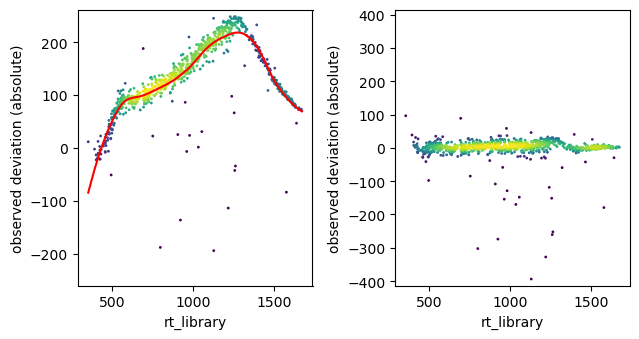

0:04:10.482466  INFO: calibration group: precursor, fitting mobility estimator 


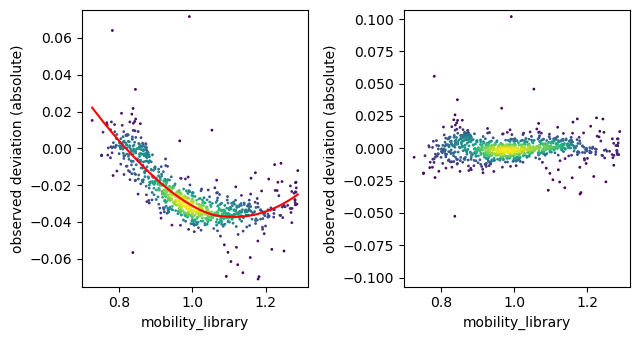

0:04:10.594016  INFO: calibration group: fragment, fitting mz estimator 


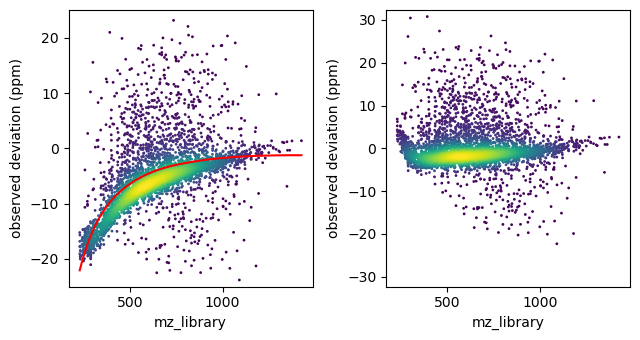

0:04:10.874530  INFO: calibration group: precursor, predicting mz
0:04:10.890809  INFO: calibration group: precursor, predicting rt
0:04:10.918335  INFO: calibration group: precursor, predicting mobility
0:04:10.931249  INFO: calibration group: fragment, predicting mz
0:04:11.276393  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:04:11.279617  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 31.596276423074094, Mobility error: 0.04
0:04:11.281577  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:04:11.281894  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:11.282124  INFO: FWHM in RT is 4.95 seconds, sigma is 1.09
0:04:11.282470  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 5.83


7824


100%|██████████| 12608/12608 [00:02<00:00, 4878.84it/s]
0:04:21.826740  WARNING: base_width_mobility has 8 NaNs ( 0.06 % out of 12608)
0:04:21.827422  WARNING: base_width_rt has 8 NaNs ( 0.06 % out of 12608)
0:04:21.828024  WARNING: rt_observed has 8 NaNs ( 0.06 % out of 12608)
0:04:21.828491  WARNING: mobility_observed has 8 NaNs ( 0.06 % out of 12608)
0:04:21.829103  WARNING: mono_ms1_intensity has 8 NaNs ( 0.06 % out of 12608)
0:04:21.829559  WARNING: top_ms1_intensity has 8 NaNs ( 0.06 % out of 12608)
0:04:21.829971  WARNING: sum_ms1_intensity has 8 NaNs ( 0.06 % out of 12608)
0:04:21.830500  WARNING: weighted_ms1_intensity has 8 NaNs ( 0.06 % out of 12608)
0:04:21.831017  WARNING: weighted_mass_deviation has 8 NaNs ( 0.06 % out of 12608)
0:04:21.831666  WARNING: weighted_mass_error has 8 NaNs ( 0.06 % out of 12608)
0:04:21.832202  WARNING: mz_library has 8 NaNs ( 0.06 % out of 12608)
0:04:21.832648  WARNING: mz_observed has 8 NaNs ( 0.06 % out of 12608)
0:04:21.833250  WARNING: mo

(12591, 37)
(12591,)


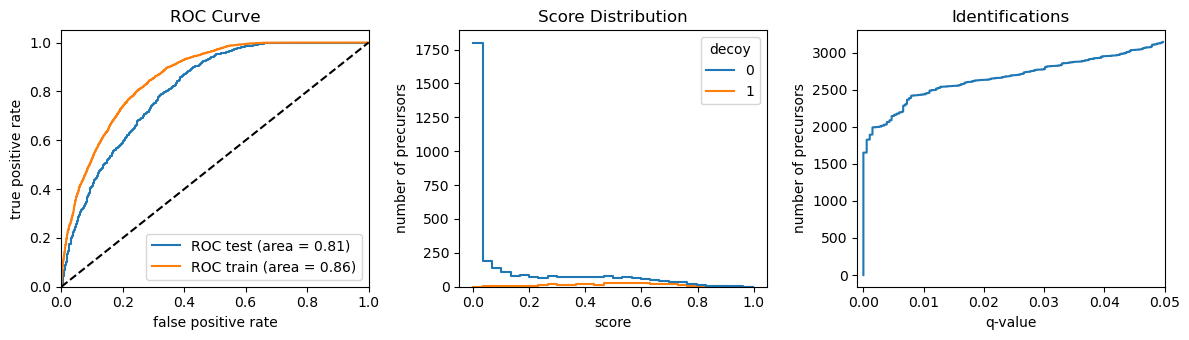

0:04:25.383767  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:04:25.384061  PROGRESS: Accumulated precursors: 3,901, 0.01 FDR: 2,436, 0.001 FDR: 1,826
0:04:25.386817  INFO: calibration group: precursor, fitting mz estimator 


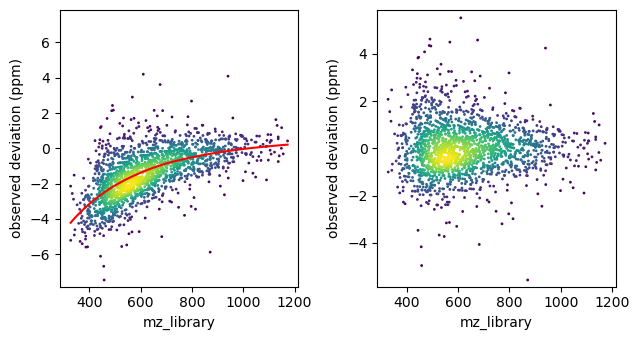

0:04:25.523816  INFO: calibration group: precursor, fitting rt estimator 


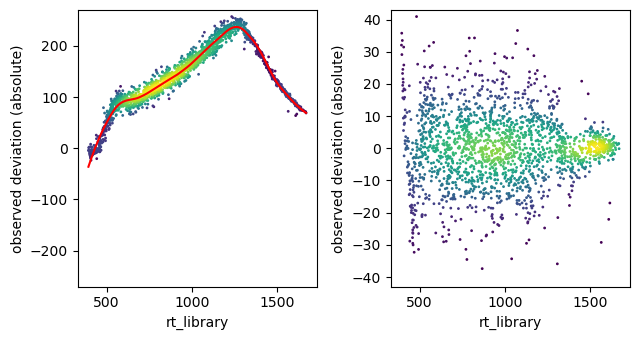

0:04:25.675202  INFO: calibration group: precursor, fitting mobility estimator 


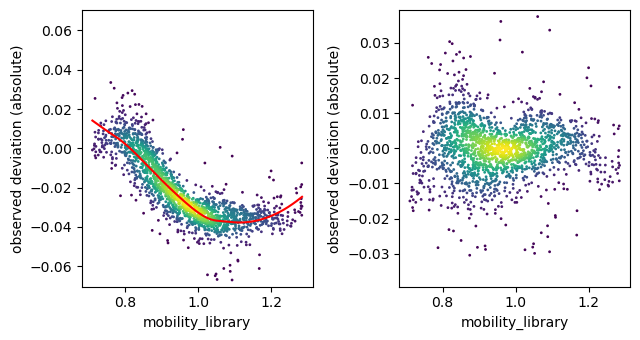

0:04:25.822953  INFO: calibration group: fragment, fitting mz estimator 


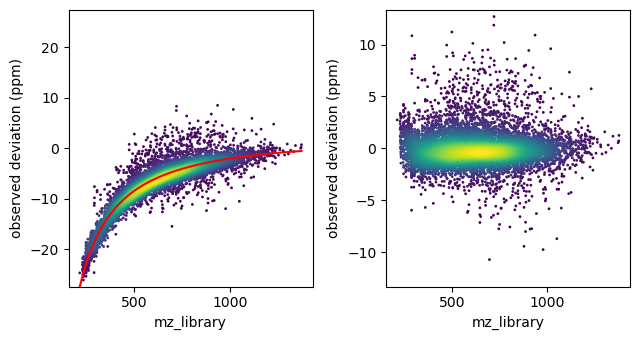

0:04:26.570952  INFO: calibration group: precursor, predicting mz
0:04:26.581903  INFO: calibration group: precursor, predicting rt
0:04:26.609504  INFO: calibration group: precursor, predicting mobility
0:04:26.620075  INFO: calibration group: fragment, predicting mz
0:04:26.947987  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:04:26.953055  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:04:26.955006  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:04:26.955299  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:26.955551  INFO: FWHM in RT is 4.45 seconds, sigma is 0.99
0:04:26.955817  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.39


7804


100%|██████████| 12044/12044 [00:02<00:00, 4869.44it/s]
0:04:35.416495  WARNING: base_width_mobility has 11 NaNs ( 0.09 % out of 12044)
0:04:35.417352  WARNING: base_width_rt has 11 NaNs ( 0.09 % out of 12044)
0:04:35.417772  WARNING: rt_observed has 11 NaNs ( 0.09 % out of 12044)
0:04:35.418247  WARNING: mobility_observed has 11 NaNs ( 0.09 % out of 12044)
0:04:35.418668  WARNING: mono_ms1_intensity has 11 NaNs ( 0.09 % out of 12044)
0:04:35.419334  WARNING: top_ms1_intensity has 11 NaNs ( 0.09 % out of 12044)
0:04:35.419960  WARNING: sum_ms1_intensity has 11 NaNs ( 0.09 % out of 12044)
0:04:35.420614  WARNING: weighted_ms1_intensity has 11 NaNs ( 0.09 % out of 12044)
0:04:35.421108  WARNING: weighted_mass_deviation has 11 NaNs ( 0.09 % out of 12044)
0:04:35.421723  WARNING: weighted_mass_error has 11 NaNs ( 0.09 % out of 12044)
0:04:35.422182  WARNING: mz_library has 11 NaNs ( 0.09 % out of 12044)
0:04:35.422687  WARNING: mz_observed has 11 NaNs ( 0.09 % out of 12044)
0:04:35.423124 

(12019, 37)
(12019,)


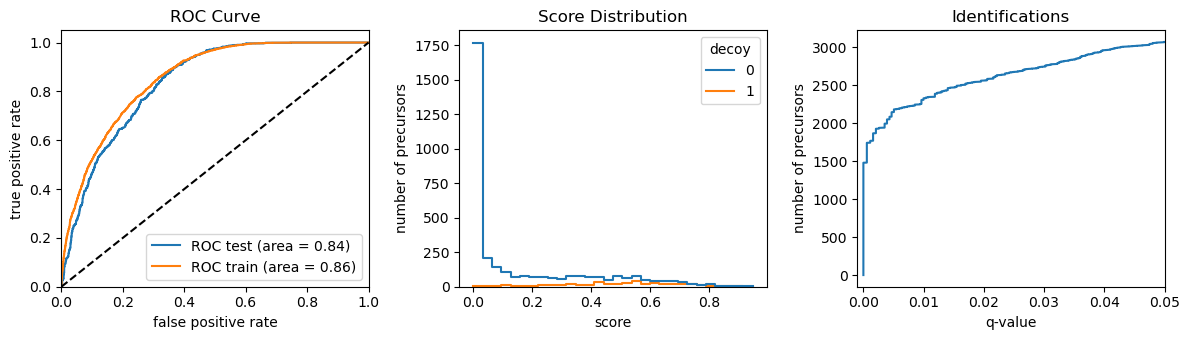

0:04:38.216029  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:04:38.216648  PROGRESS: Accumulated precursors: 3,880, 0.01 FDR: 2,327, 0.001 FDR: 1,741
0:04:38.218719  INFO: calibration group: precursor, fitting mz estimator 


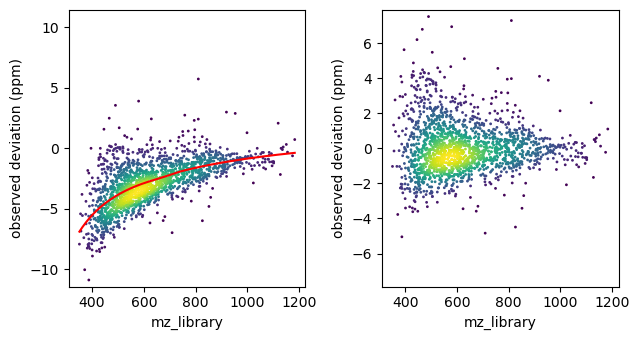

0:04:38.363143  INFO: calibration group: precursor, fitting rt estimator 


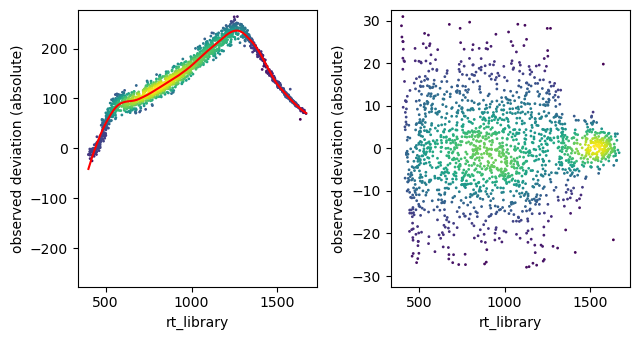

0:04:38.500026  INFO: calibration group: precursor, fitting mobility estimator 


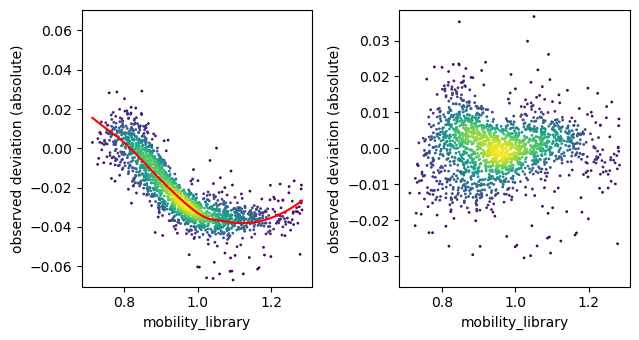

0:04:38.640206  INFO: calibration group: fragment, fitting mz estimator 


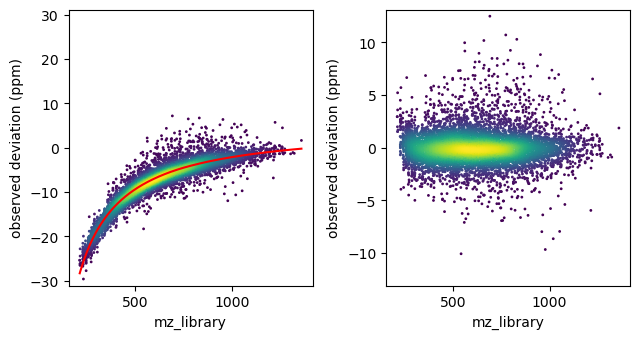

0:04:39.287405  INFO: calibration group: precursor, predicting mz
0:04:39.301224  INFO: calibration group: precursor, predicting rt
0:04:39.328721  INFO: calibration group: precursor, predicting mobility
0:04:39.339781  INFO: calibration group: fragment, predicting mz
0:04:39.662315  PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 4000 ===
0:04:39.665896  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:04:39.667802  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:04:39.668072  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:39.668294  INFO: FWHM in RT is 4.56 seconds, sigma is 1.01
0:04:39.668516  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.50


7838


100%|██████████| 12220/12220 [00:02<00:00, 4784.56it/s]
0:04:48.460373  WARNING: base_width_mobility has 7 NaNs ( 0.06 % out of 12220)
0:04:48.461354  WARNING: base_width_rt has 7 NaNs ( 0.06 % out of 12220)
0:04:48.462332  WARNING: rt_observed has 7 NaNs ( 0.06 % out of 12220)
0:04:48.463056  WARNING: mobility_observed has 7 NaNs ( 0.06 % out of 12220)
0:04:48.463566  WARNING: mono_ms1_intensity has 7 NaNs ( 0.06 % out of 12220)
0:04:48.464210  WARNING: top_ms1_intensity has 7 NaNs ( 0.06 % out of 12220)
0:04:48.464661  WARNING: sum_ms1_intensity has 7 NaNs ( 0.06 % out of 12220)
0:04:48.465236  WARNING: weighted_ms1_intensity has 7 NaNs ( 0.06 % out of 12220)
0:04:48.465798  WARNING: weighted_mass_deviation has 7 NaNs ( 0.06 % out of 12220)
0:04:48.466438  WARNING: weighted_mass_error has 7 NaNs ( 0.06 % out of 12220)
0:04:48.466994  WARNING: mz_library has 7 NaNs ( 0.06 % out of 12220)
0:04:48.467821  WARNING: mz_observed has 7 NaNs ( 0.06 % out of 12220)
0:04:48.468469  WARNING: mo

(12203, 37)
(12203,)


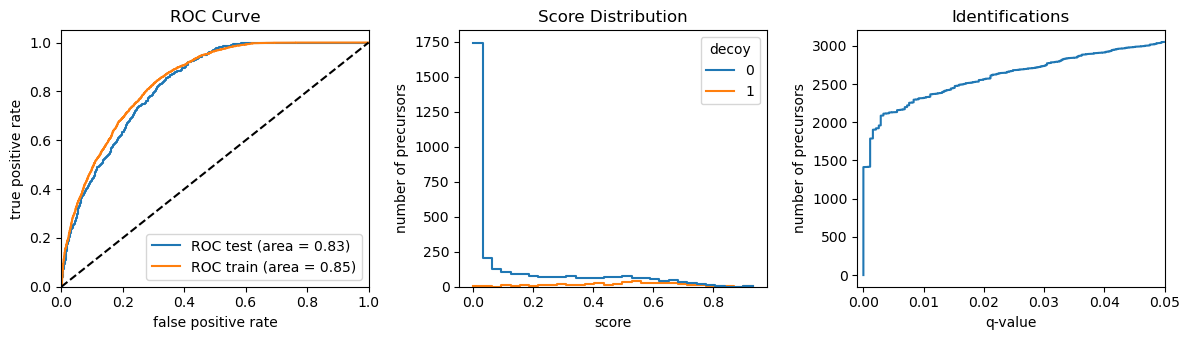

0:04:51.098519  PROGRESS: === checking if recalibration conditions were reached, target 800 precursors ===
0:04:51.098910  PROGRESS: Accumulated precursors: 3,905, 0.01 FDR: 2,316, 0.001 FDR: 1,417
0:04:51.100827  INFO: calibration group: precursor, fitting mz estimator 


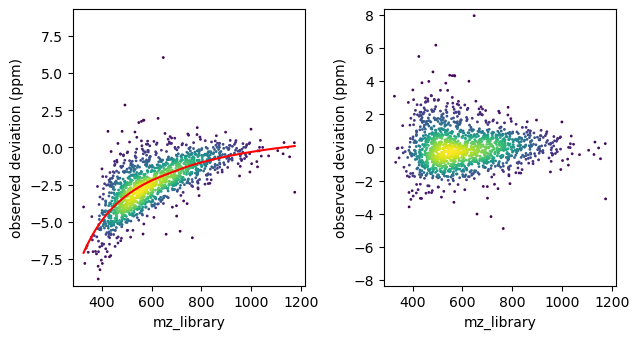

0:04:51.228130  INFO: calibration group: precursor, fitting rt estimator 


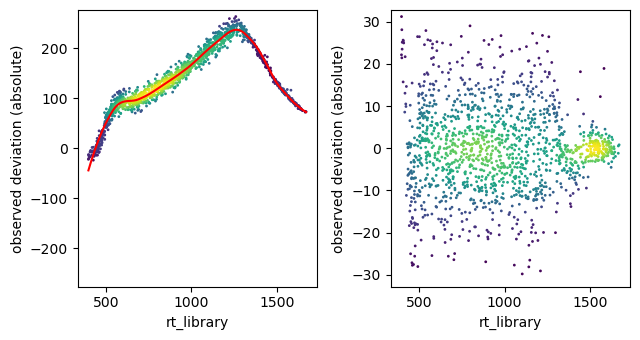

0:04:51.342078  INFO: calibration group: precursor, fitting mobility estimator 


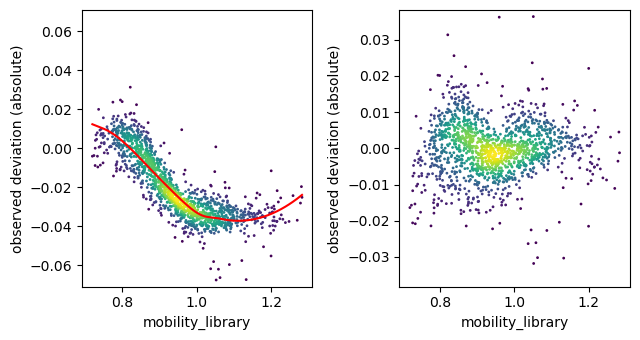

0:04:51.471822  INFO: calibration group: fragment, fitting mz estimator 


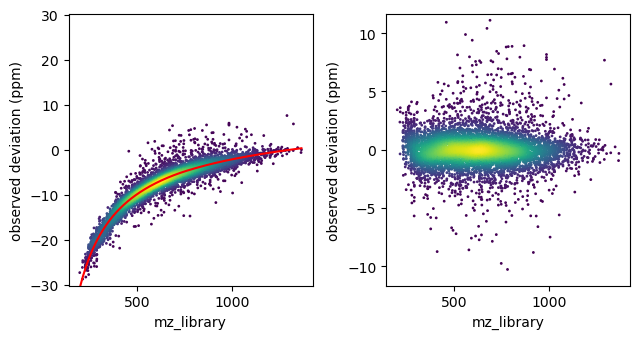

0:04:52.244135  INFO: calibration group: precursor, predicting mz
0:04:52.256448  INFO: calibration group: precursor, predicting rt
0:04:52.281628  INFO: calibration group: precursor, predicting mobility
0:04:52.298451  INFO: calibration group: fragment, predicting mz
0:04:52.673762  PROGRESS: === Epoch 4, step 0, extracting elution groups 0 to 4000 ===
0:04:52.676704  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:04:52.678539  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:04:52.678865  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:52.679087  INFO: FWHM in RT is 4.53 seconds, sigma is 1.00
0:04:52.679311  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.68


7820


100%|██████████| 12208/12208 [00:02<00:00, 4864.02it/s]
0:05:01.054035  WARNING: base_width_mobility has 6 NaNs ( 0.05 % out of 12208)
0:05:01.054817  WARNING: base_width_rt has 6 NaNs ( 0.05 % out of 12208)
0:05:01.055282  WARNING: rt_observed has 6 NaNs ( 0.05 % out of 12208)
0:05:01.055773  WARNING: mobility_observed has 6 NaNs ( 0.05 % out of 12208)
0:05:01.056324  WARNING: mono_ms1_intensity has 6 NaNs ( 0.05 % out of 12208)
0:05:01.056891  WARNING: top_ms1_intensity has 6 NaNs ( 0.05 % out of 12208)
0:05:01.057500  WARNING: sum_ms1_intensity has 6 NaNs ( 0.05 % out of 12208)
0:05:01.058171  WARNING: weighted_ms1_intensity has 6 NaNs ( 0.05 % out of 12208)
0:05:01.058749  WARNING: weighted_mass_deviation has 6 NaNs ( 0.05 % out of 12208)
0:05:01.059204  WARNING: weighted_mass_error has 6 NaNs ( 0.05 % out of 12208)
0:05:01.059823  WARNING: mz_library has 6 NaNs ( 0.05 % out of 12208)
0:05:01.060273  WARNING: mz_observed has 6 NaNs ( 0.05 % out of 12208)
0:05:01.060676  WARNING: mo

(12186, 37)
(12186,)


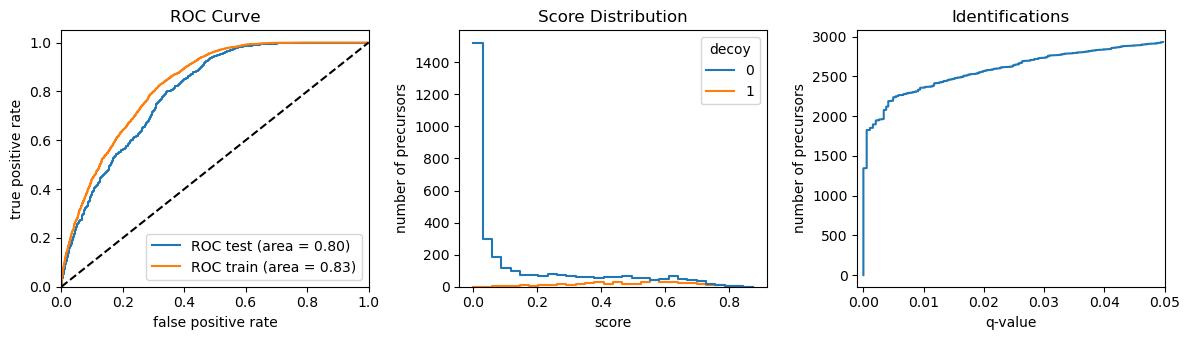

0:05:02.431527  PROGRESS: === checking if recalibration conditions were reached, target 1000 precursors ===
0:05:02.431846  PROGRESS: Accumulated precursors: 3,890, 0.01 FDR: 2,357, 0.001 FDR: 1,824
0:05:02.433065  INFO: calibration group: precursor, fitting mz estimator 


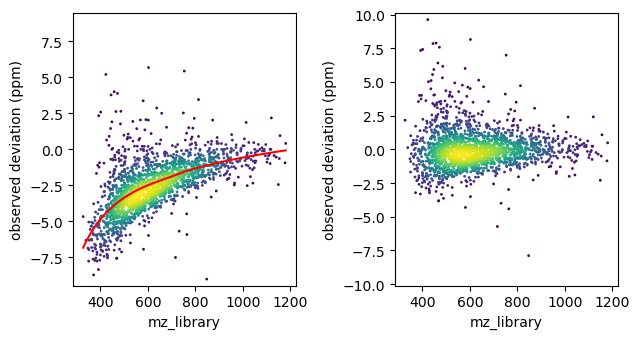

0:05:02.581179  INFO: calibration group: precursor, fitting rt estimator 


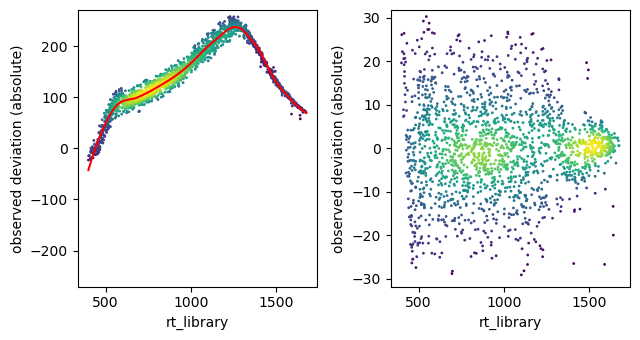

0:05:02.709693  INFO: calibration group: precursor, fitting mobility estimator 


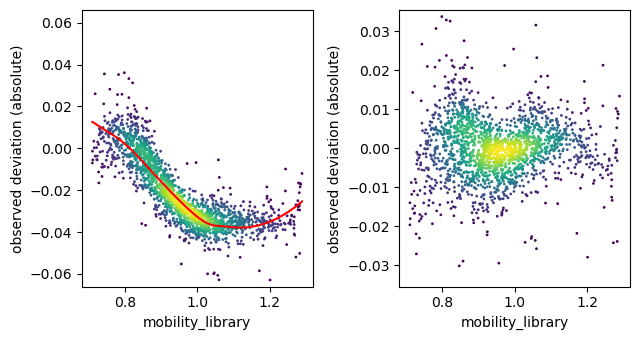

0:05:02.851335  INFO: calibration group: fragment, fitting mz estimator 


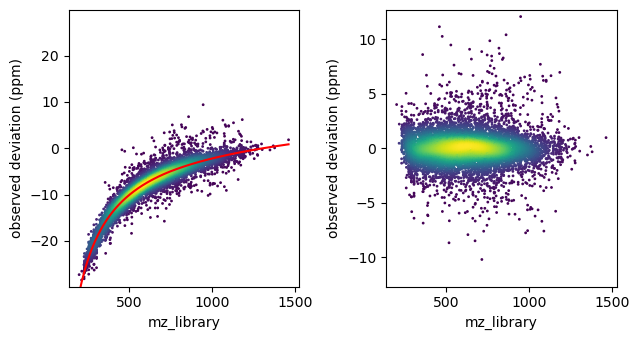

0:05:03.567517  INFO: calibration group: precursor, predicting mz
0:05:03.580956  INFO: calibration group: precursor, predicting rt
0:05:03.610182  INFO: calibration group: precursor, predicting mobility
0:05:03.621894  INFO: calibration group: fragment, predicting mz
0:05:03.945218  INFO: calibration group: precursor, predicting mz
0:05:03.957887  INFO: calibration group: precursor, predicting rt
0:05:03.988121  INFO: calibration group: precursor, predicting mobility
0:05:03.998985  INFO: calibration group: fragment, predicting mz


In [6]:

for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    break
reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

workflow = Workflow(
    plan.config, 
    dia_data, 
    reference_flat, 
    fragments_flat
)

workflow.calibration()
#workflow.calibration_manager.load(os.path.join(output_location, 'calibration.pkl'))
#workflow.calibration_manager.save(os.path.join(output_location, 'calibration.pkl'))

0:04:25.392770  INFO: calibration group: precursor, predicting mz
0:04:25.402935  INFO: calibration group: precursor, predicting rt
0:04:25.431170  INFO: calibration group: precursor, predicting mobility
0:04:25.441987  INFO: calibration group: fragment, predicting mz
0:04:25.735325  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:04:25.750250  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:04:25.750666  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:25.750932  INFO: FWHM in RT is 4.53 seconds, sigma is 1.00
0:04:25.751139  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.62


91732


100%|██████████| 293557/293557 [01:02<00:00, 4683.76it/s]
0:06:50.285421  WARNING: base_width_mobility has 194 NaNs ( 0.07 % out of 293557)
0:06:50.286735  WARNING: base_width_rt has 194 NaNs ( 0.07 % out of 293557)
0:06:50.287833  WARNING: rt_observed has 194 NaNs ( 0.07 % out of 293557)
0:06:50.288764  WARNING: mobility_observed has 194 NaNs ( 0.07 % out of 293557)
0:06:50.289722  WARNING: mono_ms1_intensity has 194 NaNs ( 0.07 % out of 293557)
0:06:50.290619  WARNING: top_ms1_intensity has 194 NaNs ( 0.07 % out of 293557)
0:06:50.291477  WARNING: sum_ms1_intensity has 194 NaNs ( 0.07 % out of 293557)
0:06:50.292425  WARNING: weighted_ms1_intensity has 194 NaNs ( 0.07 % out of 293557)
0:06:50.293464  WARNING: weighted_mass_deviation has 194 NaNs ( 0.07 % out of 293557)
0:06:50.294480  WARNING: weighted_mass_error has 194 NaNs ( 0.07 % out of 293557)
0:06:50.295485  WARNING: mz_library has 194 NaNs ( 0.07 % out of 293557)
0:06:50.296511  WARNING: mz_observed has 194 NaNs ( 0.07 % out 

(293169, 37)
(293169,)


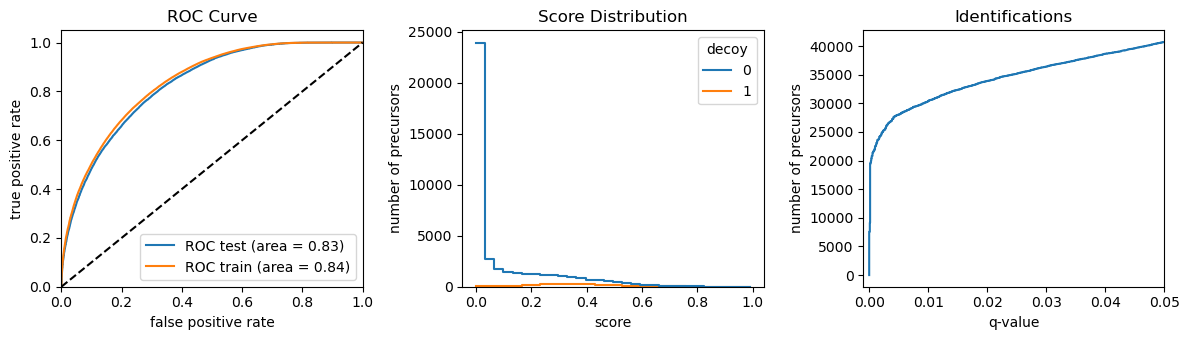

0:07:40.710381  PROGRESS: === extraction finished, 0.05 FDR: 38,776, 0.01 FDR: 30,071, 0.001 FDR: 22,391 ===


In [6]:
df_d0 = workflow.extraction()